In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import json
import re
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score

In [3]:
import tensorflow as tf
import transformers
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
#importing libraries for model evaluation and algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
import nltk
from sklearn import preprocessing
from nltk.tokenize import sent_tokenize, word_tokenize
# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#dl libraraies
import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization,Reshape,Dot,Concatenate,Add,Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
#import cv2
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import os
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LSTM, GRU
from keras.preprocessing.sequence import pad_sequences
# specifically for deeplearning.
from tensorflow.keras.layers import Dropout, Flatten,Activation,Input,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, callbacks
from tensorflow.keras import Model, Sequential

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re
import string

Sentiment

In [6]:
df_train = pd.read_csv('data/stock_data.csv')
df_val = pd.read_csv('data/stock_data.csv')
df_test = pd.read_csv('data/stock_data.csv')

In [7]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
Text         5791 non-null object
Sentiment    5791 non-null int64
dtypes: int64(1), object(1)
memory usage: 90.6+ KB
None


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


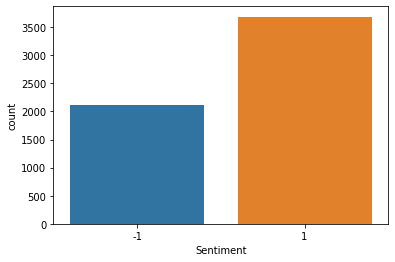

In [8]:
import seaborn as sns
sns.countplot(x="Sentiment", data = df_train)

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [10]:
comment_words = ''
stopwords = set(STOPWORDS)

In [11]:
for val in df_train.Text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

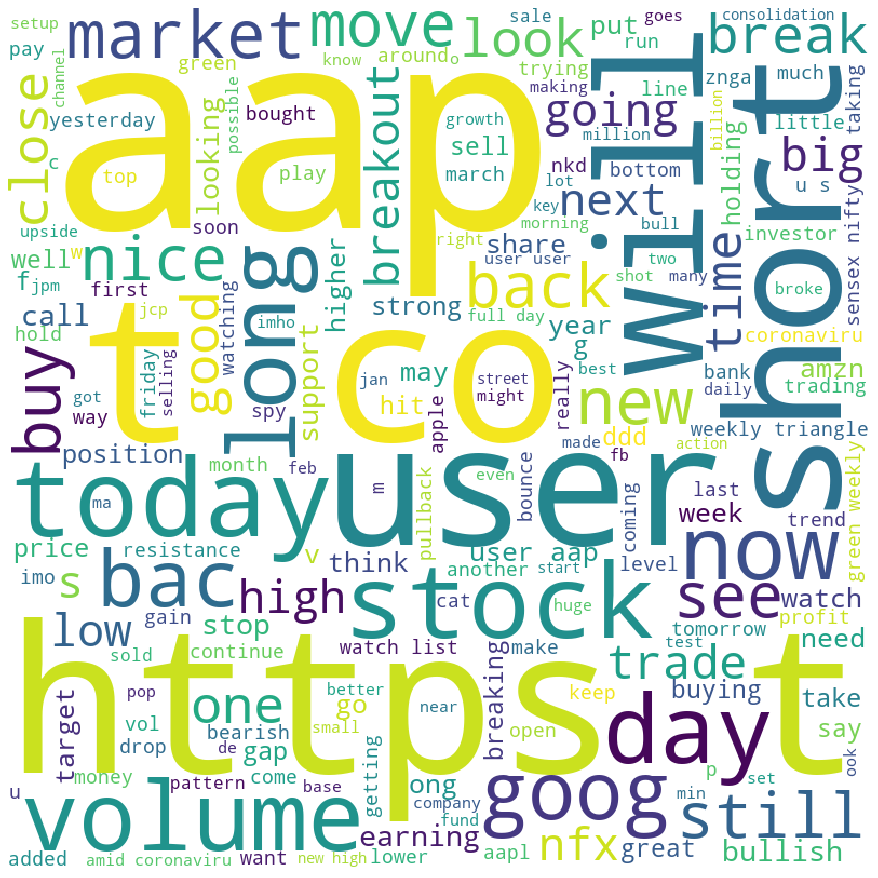

In [12]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [13]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer

In [14]:
Tweet = []
Labels = []

for row in df_train["Text"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Tweet.append(lemma_list)

In [15]:
X = df_train['Text']
y = df_train['Sentiment'] 

In [16]:
# Extract Feature With CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [241]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(d, 3))
    recall.append(round(c, 3))
    f1score.append(round(b, 3))

# MLP

In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train) 
y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred)
mlp_prec = precision_score(y_test, y_pred,average='weighted')
mlp_rec = recall_score(y_test, y_pred,average='weighted')
mlp_f1 = f1_score(y_test, y_pred,average='weighted')

In [242]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

# Voting Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [268]:
storeResults('Voting CLassifier',vot_acc,vot_prec,vot_rec,vot_f1)

DL

In [21]:
#reading the dataframe
data=pd.read_csv('data/stock_data.csv')
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [22]:
# changing attack labels to their respective attack class
def change_label(df):
  df.Sentiment.replace([-1],0,inplace=True)

In [23]:
change_label(data)

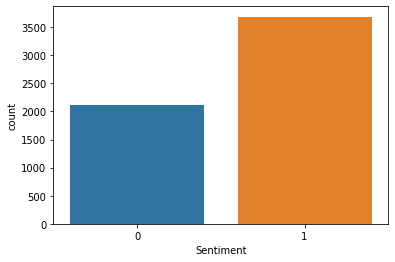

In [24]:
sns.countplot(x="Sentiment", data = data)

In [25]:
#Setting parameters which will be used throughout
num_words = 15000  # Parameter indicating the number of words we'll put in the dictionary
val_size = 100  # Size of the validation set
epochs = 20  # Number of epochs we usually start to train with
batch_size = 8  # Size of the batches used in the mini-batch gradient descent
#Taking only two columns since it's a sentiment analysis

In [26]:
num_classes = data.Sentiment.nunique()
print(num_classes)

2


In [27]:
def cleaning_text(text):
    stop_words = stopwords.words("english")

    text = re.sub(r'http\S+', " ", text)    # remove urls
    text = re.sub(r'@\w+',' ',text)         # remove mentions
    text = re.sub(r'#\w+', ' ', text)       # remove hastags
    text = re.sub('r<.*?>',' ', text)       # remove html tags
    
    # remove stopwords 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_words])

    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    
    return text

In [28]:
data['text'] = data['Text'].apply(lambda x: cleaning_text(x))

In [29]:
# Maximum sentence length
max_len_words = max(list(data['text'].apply(len)))
print(max_len_words)

126


In [30]:
def tokenizer(x_train, y_train, max_len_word):
    # because the data distribution is imbalanced, "stratify" is used
    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                      test_size=.2, shuffle=True, 
                                                      stratify=y_train, random_state=0)

    # Tokenizer
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(X_train)
    sequence_dict = tokenizer.word_index
    word_dict = dict((num, val) for (val, num) in sequence_dict.items())

    # Sequence data
    train_sequences = tokenizer.texts_to_sequences(X_train)
    train_padded = pad_sequences(train_sequences,
                                 maxlen=max_len_word,
                                 truncating='post',
                                 padding='post')
    
    val_sequences = tokenizer.texts_to_sequences(X_val)
    val_padded = pad_sequences(val_sequences,
                                maxlen=max_len_word,
                                truncating='post',
                                padding='post', )
    
    print(train_padded.shape)
    print(val_padded.shape)
    print('Total words: {}'.format(len(word_dict)))
    return train_padded, val_padded, y_train, y_val, word_dict

X_train, X_val, y_train, y_val, word_dict = tokenizer(data.Text, data.Sentiment, 100)

(4632, 100)
(1159, 100)
Total words: 8980


# CNN

In [31]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
def build_cnn_model():
    model = Sequential()
    
    model.add(Embedding(5000, 100, input_length=100))


    model.add(Conv1D(64, 2, padding='same', activation='relu'))
    model.add(MaxPooling1D(2))
    #model.add(MaxPooling1D(2))
    
    model.add(Flatten())
    
    model.add(Dense(units=1024,activation="relu"))
    model.add(Dense(units=512,activation="relu"))
    
    model.add(Dense(units=num_classes,activation="softmax"))
    
    optimizer = Adam(lr=0.000055,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=tf.keras.losses.SparseCategoricalCrossentropy())
    return model

In [32]:
cnn_model = build_cnn_model()

In [33]:
history = cnn_model.fit(X_train, y_train,
                    epochs=20, 
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/20
145/145 [==============================] - 5s 29ms/step - loss: 0.6556 - accuracy: 0.6360 - val_loss: 0.6540 - val_accuracy: 0.6368
Epoch 2/20
145/145 [==============================] - 5s 31ms/step - loss: 0.6474 - accuracy: 0.6362 - val_loss: 0.6456 - val_accuracy: 0.6368
Epoch 3/20
145/145 [==============================] - 6s 40ms/step - loss: 0.6079 - accuracy: 0.6608 - val_loss: 0.5915 - val_accuracy: 0.6557
Epoch 4/20
145/145 [==============================] - 6s 39ms/step - loss: 0.4494 - accuracy: 0.7923 - val_loss: 0.4940 - val_accuracy: 0.7524
Epoch 5/20
145/145 [==============================] - 6s 39ms/step - loss: 0.2837 - accuracy: 0.8912 - val_loss: 0.4869 - val_accuracy: 0.7886
Epoch 6/20
145/145 [==============================] - 6s 38ms/step - loss: 0.1769 - accuracy: 0.9411 - val_loss: 0.5331 - val_accuracy: 0.7886
Epoch 7/20
145/145 [==============================] - 6s 38ms/step - loss: 0.1093 - accuracy: 0.9668 - val_loss: 0.5526 - val_accuracy: 0.7826

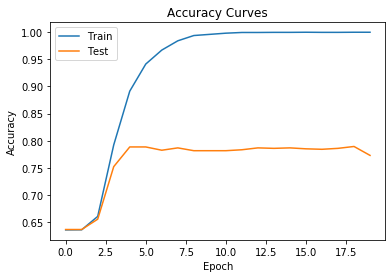

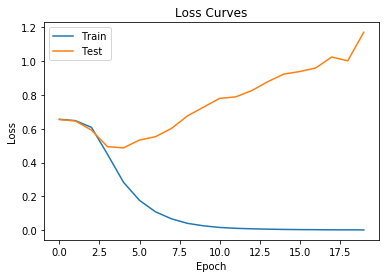

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
y_pred = cnn_model.predict(X_val, batch_size=16)
y_pred = np.argmax(y_pred,axis=1)

cnn_acc = accuracy_score(y_val, y_pred)
cnn_prec = precision_score(y_val, y_pred,average='weighted')
cnn_rec = recall_score(y_val, y_pred,average='weighted')
cnn_f1 = f1_score(y_val, y_pred,average='weighted')

In [243]:
storeResults('CNN',cnn_acc,cnn_prec,cnn_rec,cnn_f1)

# LSTM 

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [37]:
#tweets conssits of every document as an array of tokenized words which are later appended to docs 
tweets=[word_tokenize(tweet) for tweet in data['Text']]
docs=[]
for j in range(0,len(tweets)):
    docs.append(tweets[j])

In [38]:
#stops included both the stopwords and punctuations
from nltk.corpus import stopwords
import string
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
not_list = ["n't", "not", "no"]
stops.update(punctuations)
stops.update(not_list)

#to get the simple pos(part of speech) tag
from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [39]:
#to get the pos tag for a word
from nltk import pos_tag
# now we are going to clean our data 
# we will remove stopwords and punctuations and lemmatize each document
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def clean(words):
    output=[]
    for word in words:
        if word.lower() not in stops or word.lower() in not_list:
            pos=pos_tag(word)
            clean_word=lemmatizer.lemmatize(word,pos=get_simple_pos(pos[0][1]))
            output.append(clean_word.lower())
    str1=" ".join(output).encode('utf-8')        
    return str1
#docs=[ clean(doc) for doc in docs]      

In [40]:
#taking variables to be used for train test split as X,y
X,Y=data['Text'].values,pd.get_dummies(data.Sentiment.values)

In [41]:
#using tokenizers to create the tokens having no of words=15000(num_words)
tk = Tokenizer(num_words=num_words,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
#Complete data is tokenized to vectors and padding is done using zeros to match its length to the largest text in the dataset.
tk.fit_on_texts(X)
X = tk.texts_to_sequences(X)
X = pad_sequences(X)
#print(X[:2])
print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 5791 documents
15000 words in dictionary
Top 5 most common words are: [('the', 1992), ('to', 1816), ('a', 1386), ('on', 1098), ('in', 1032)]


In [42]:
import pickle
pickle.dump(tk,open('transform.pkl','wb'))

In [43]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print('# Train data samples:', X_train.shape)
print('# Test data samples:', X_test.shape)

# Train data samples: (4632, 34)
# Test data samples: (1159, 34)


In [44]:
#Function defined to test the models in the test set
def test_model(model, epoch_stop):
    model.fit(X_train, Y_train
              , epochs=epoch_stop
              , batch_size=batch_size
              , verbose=0)
    results = model.evaluate(X_train, Y_train)
    
    return results

In [45]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [46]:
embed_dim = 128 #dimension of the word embedding vector for each word in a sequence 
lstm_out = 196  #no of lstm layers
lstm_model = Sequential()
lstm_model.add(Embedding(num_words, embed_dim,input_length = X_train.shape[1]))
#Adding dropout
lstm_model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
#Adding a regularized dense layer
lstm_model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(Dense(2,activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy',f1_m,recall_m,precision_m])
#print(lstm_model.summary())

In [47]:
#model trained on the training data and taking validation data into account to avoid overfitting for 4 epochs 
history_LSTM=lstm_model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size,validation_data=(X_test, Y_test),verbose = 1)

Epoch 1/20
579/579 [==============================] - 58s 97ms/step - loss: 0.5979 - accuracy: 0.6978 - f1_m: 0.6978 - recall_m: 0.6978 - precision_m: 0.6978 - val_loss: 0.3580 - val_accuracy: 0.8661 - val_f1_m: 0.8661 - val_recall_m: 0.8661 - val_precision_m: 0.8661
Epoch 2/20
579/579 [==============================] - 57s 98ms/step - loss: 0.3569 - accuracy: 0.8683 - f1_m: 0.8683 - recall_m: 0.8683 - precision_m: 0.8683 - val_loss: 0.1559 - val_accuracy: 0.9573 - val_f1_m: 0.9573 - val_recall_m: 0.9573 - val_precision_m: 0.9573
Epoch 3/20
579/579 [==============================] - 56s 96ms/step - loss: 0.1902 - accuracy: 0.9387 - f1_m: 0.9387 - recall_m: 0.9387 - precision_m: 0.9387 - val_loss: 0.0878 - val_accuracy: 0.9814 - val_f1_m: 0.9814 - val_recall_m: 0.9814 - val_precision_m: 0.9814
Epoch 4/20
579/579 [==============================] - 56s 96ms/step - loss: 0.0909 - accuracy: 0.9737 - f1_m: 0.9737 - recall_m: 0.9737 - precision_m: 0.9737 - val_loss: 0.0376 - val_accuracy: 0.9

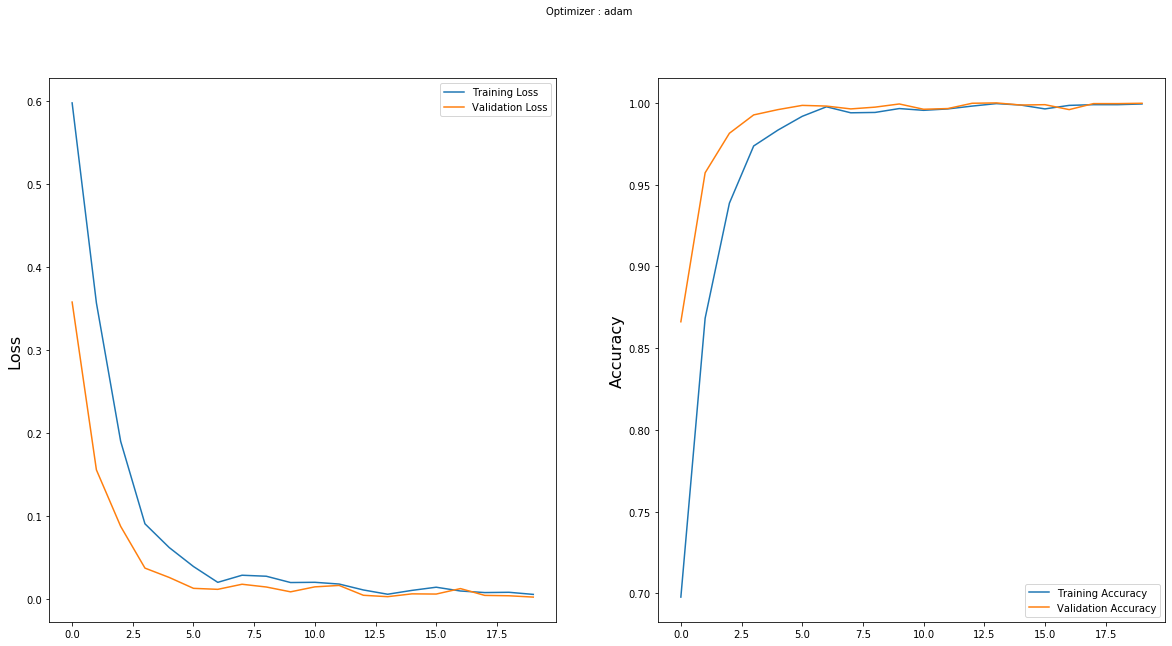

In [48]:
import matplotlib.pyplot as plt

x=history_LSTM
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [49]:
lstm_acc = history_LSTM.history['val_accuracy'][19]
lstm_prec = history_LSTM.history['val_precision_m'][19]
lstm_rec = history_LSTM.history['val_recall_m'][19]
lstm_f1 = history_LSTM.history['val_f1_m'][19]

In [244]:
storeResults('LSTM',lstm_acc,lstm_prec,lstm_rec,lstm_f1)

# MS-LSTM

In [51]:
embed_dim = 128 #dimension of the word embedding vector for each word in a sequence 
lstm_out = 196  #no of lstm layers
lstm_model = Sequential()
lstm_model.add(Embedding(num_words, embed_dim,input_length = X_train.shape[1]))
#Adding dropout
lstm_model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
#Adding a regularized dense layer
lstm_model.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
lstm_model.add(layers.Dropout(0.5))

lstm_model.add(Dense(2,activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy',f1_m,recall_m,precision_m])
#print(lstm_model.summary())

In [52]:
#model trained on the training data and taking validation data into account to avoid overfitting for 4 epochs 
history_LSTM=lstm_model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size,validation_data=(X_test, Y_test),verbose = 1)

Epoch 1/20
579/579 [==============================] - 52s 87ms/step - loss: 0.6006 - accuracy: 0.7081 - f1_m: 0.7081 - recall_m: 0.7081 - precision_m: 0.7081 - val_loss: 0.4262 - val_accuracy: 0.8638 - val_f1_m: 0.8638 - val_recall_m: 0.8638 - val_precision_m: 0.8638
Epoch 2/20
579/579 [==============================] - 50s 87ms/step - loss: 0.3278 - accuracy: 0.8735 - f1_m: 0.8735 - recall_m: 0.8735 - precision_m: 0.8735 - val_loss: 0.1531 - val_accuracy: 0.9614 - val_f1_m: 0.9614 - val_recall_m: 0.9614 - val_precision_m: 0.9614
Epoch 3/20
579/579 [==============================] - 50s 87ms/step - loss: 0.1558 - accuracy: 0.9473 - f1_m: 0.9473 - recall_m: 0.9473 - precision_m: 0.9473 - val_loss: 0.0634 - val_accuracy: 0.9842 - val_f1_m: 0.9842 - val_recall_m: 0.9842 - val_precision_m: 0.9842
Epoch 4/20
579/579 [==============================] - 51s 87ms/step - loss: 0.0776 - accuracy: 0.9760 - f1_m: 0.9760 - recall_m: 0.9760 - precision_m: 0.9760 - val_loss: 0.0367 - val_accuracy: 0.9

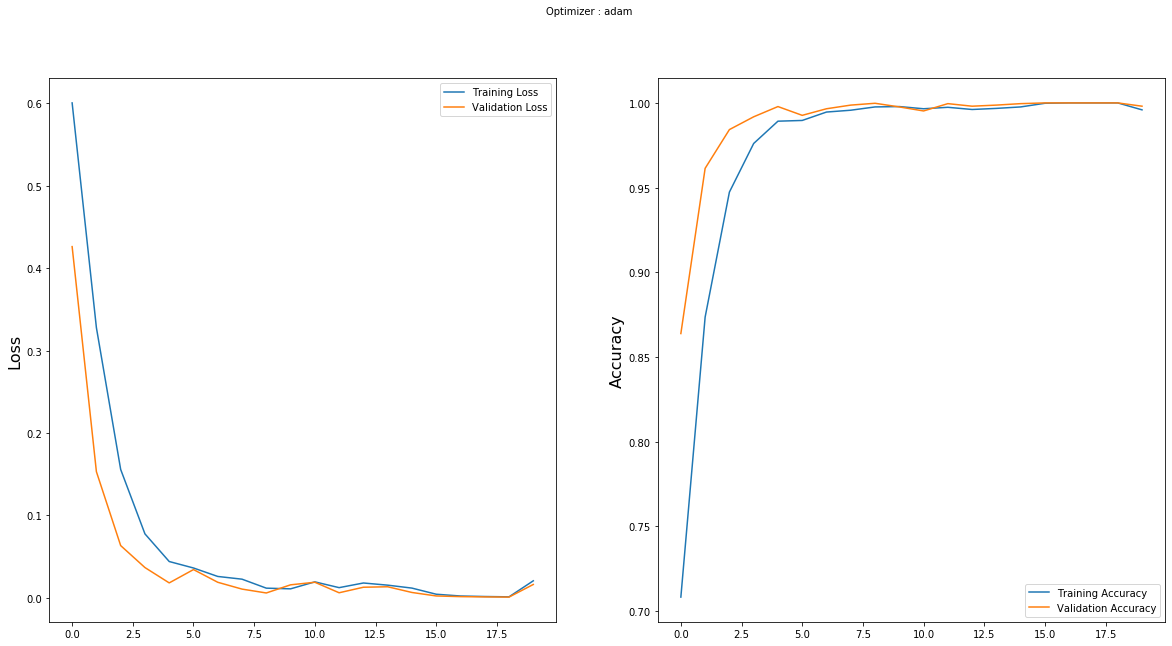

In [53]:
import matplotlib.pyplot as plt

x=history_LSTM
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [54]:
lstm1_acc = history_LSTM.history['val_accuracy'][19]
lstm1_prec = history_LSTM.history['val_precision_m'][19]
lstm1_rec = history_LSTM.history['val_recall_m'][19]
lstm1_f1 = history_LSTM.history['val_f1_m'][19]

In [245]:
storeResults('MS-LSTM',lstm1_acc,lstm1_prec,lstm1_rec,lstm1_f1)

# MS-SSA-LSTM

In [55]:
from tensorflow import keras

In [56]:
class SSA(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="SSA", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [57]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
optimizer=SSA()

In [59]:
embed_dim = 128 #dimension of the word embedding vector for each word in a sequence 
lstm_out = 196  #no of lstm layers
lstm_model = Sequential()
lstm_model.add(Embedding(num_words, embed_dim,input_length = X_train.shape[1]))
#Adding dropout
lstm_model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
#Adding a regularized dense layer
lstm_model.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(Dense(2,activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy',f1_m,recall_m,precision_m])
#print(lstm_model.summary())

In [60]:
#model trained on the training data and taking validation data into account to avoid overfitting for 4 epochs 
history_LSTM=lstm_model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size,validation_data=(X_test, Y_test),verbose = 1)

Epoch 1/20
579/579 [==============================] - 53s 89ms/step - loss: 0.5895 - accuracy: 0.7012 - f1_m: 0.7012 - recall_m: 0.7012 - precision_m: 0.7012 - val_loss: 0.3947 - val_accuracy: 0.8597 - val_f1_m: 0.8597 - val_recall_m: 0.8597 - val_precision_m: 0.8597
Epoch 2/20
579/579 [==============================] - 52s 90ms/step - loss: 0.3621 - accuracy: 0.8605 - f1_m: 0.8605 - recall_m: 0.8605 - precision_m: 0.8605 - val_loss: 0.1820 - val_accuracy: 0.9575 - val_f1_m: 0.9575 - val_recall_m: 0.9575 - val_precision_m: 0.9575
Epoch 3/20
579/579 [==============================] - 52s 90ms/step - loss: 0.1654 - accuracy: 0.9445 - f1_m: 0.9445 - recall_m: 0.9445 - precision_m: 0.9445 - val_loss: 0.0825 - val_accuracy: 0.9737 - val_f1_m: 0.9737 - val_recall_m: 0.9737 - val_precision_m: 0.9737
Epoch 4/20
579/579 [==============================] - 52s 90ms/step - loss: 0.0911 - accuracy: 0.9743 - f1_m: 0.9743 - recall_m: 0.9743 - precision_m: 0.9743 - val_loss: 0.0377 - val_accuracy: 0.9

In [61]:
lstm2_acc = history_LSTM.history['val_accuracy'][19]
lstm2_prec = history_LSTM.history['val_precision_m'][19]
lstm2_rec = history_LSTM.history['val_recall_m'][19]
lstm2_f1 = history_LSTM.history['val_f1_m'][19]

In [246]:
storeResults('MS-SSA-LSTM',lstm2_acc,lstm2_prec,lstm2_rec,lstm2_f1)

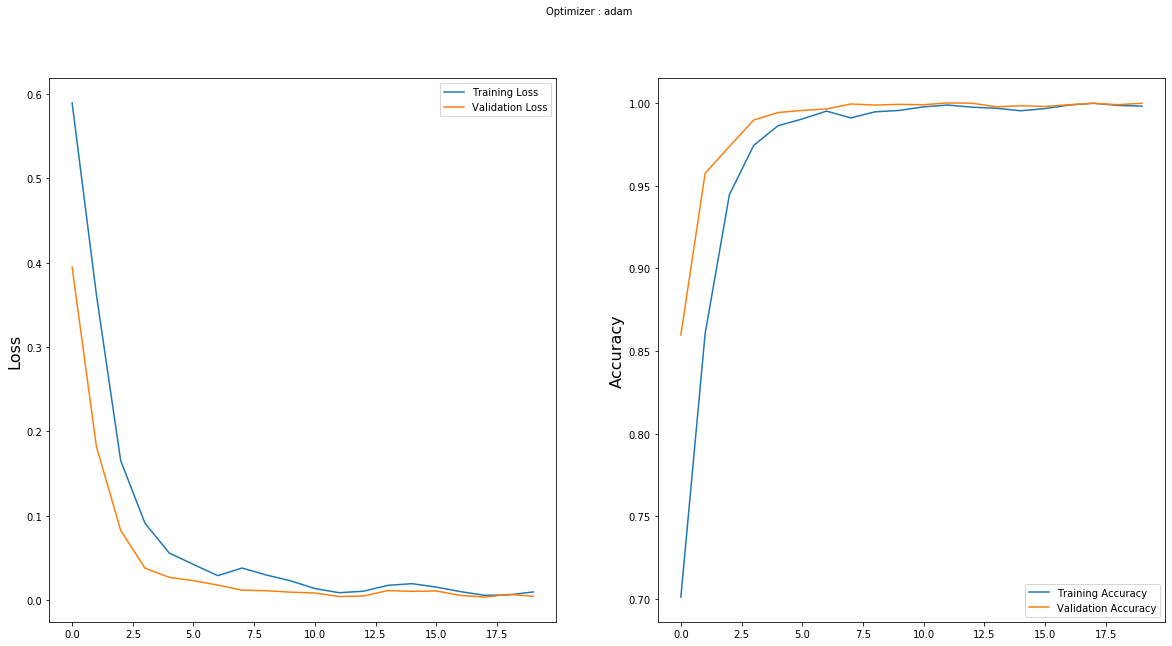

In [64]:
import matplotlib.pyplot as plt

x=history_LSTM
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# LSTM + GRU

In [66]:
model = Sequential()
model.add(Embedding(num_words, embed_dim,input_length = X_train.shape[1]))
model.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(GRU(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy',f1_m,recall_m,precision_m])
#print(model.summary())

In [67]:
trained5 = model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size,validation_data=(X_test, Y_test),verbose = 1)

Epoch 1/20
579/579 [==============================] - 29s 45ms/step - loss: 0.5531 - accuracy: 0.7066 - f1_m: 0.7066 - recall_m: 0.7066 - precision_m: 0.7066 - val_loss: 0.3024 - val_accuracy: 0.8800 - val_f1_m: 0.8800 - val_recall_m: 0.8800 - val_precision_m: 0.8800
Epoch 2/20
579/579 [==============================] - 26s 45ms/step - loss: 0.3177 - accuracy: 0.8659 - f1_m: 0.8659 - recall_m: 0.8659 - precision_m: 0.8659 - val_loss: 0.1623 - val_accuracy: 0.9603 - val_f1_m: 0.9603 - val_recall_m: 0.9603 - val_precision_m: 0.9603
Epoch 3/20
579/579 [==============================] - 40s 69ms/step - loss: 0.1552 - accuracy: 0.9417 - f1_m: 0.9417 - recall_m: 0.9417 - precision_m: 0.9417 - val_loss: 0.0531 - val_accuracy: 0.9816 - val_f1_m: 0.9816 - val_recall_m: 0.9816 - val_precision_m: 0.9816
Epoch 4/20
579/579 [==============================] - 39s 67ms/step - loss: 0.0766 - accuracy: 0.9724 - f1_m: 0.9724 - recall_m: 0.9724 - precision_m: 0.9724 - val_loss: 0.0359 - val_accuracy: 0.9

In [69]:
hyb_acc = history_LSTM.history['val_accuracy'][19]
hyb_prec = history_LSTM.history['val_precision_m'][19]
hyb_rec = history_LSTM.history['val_recall_m'][19]
hyb_f1 = history_LSTM.history['val_f1_m'][19]

In [269]:
storeResults('LSTM-GRU',hyb_acc,hyb_prec,hyb_rec,hyb_f1)

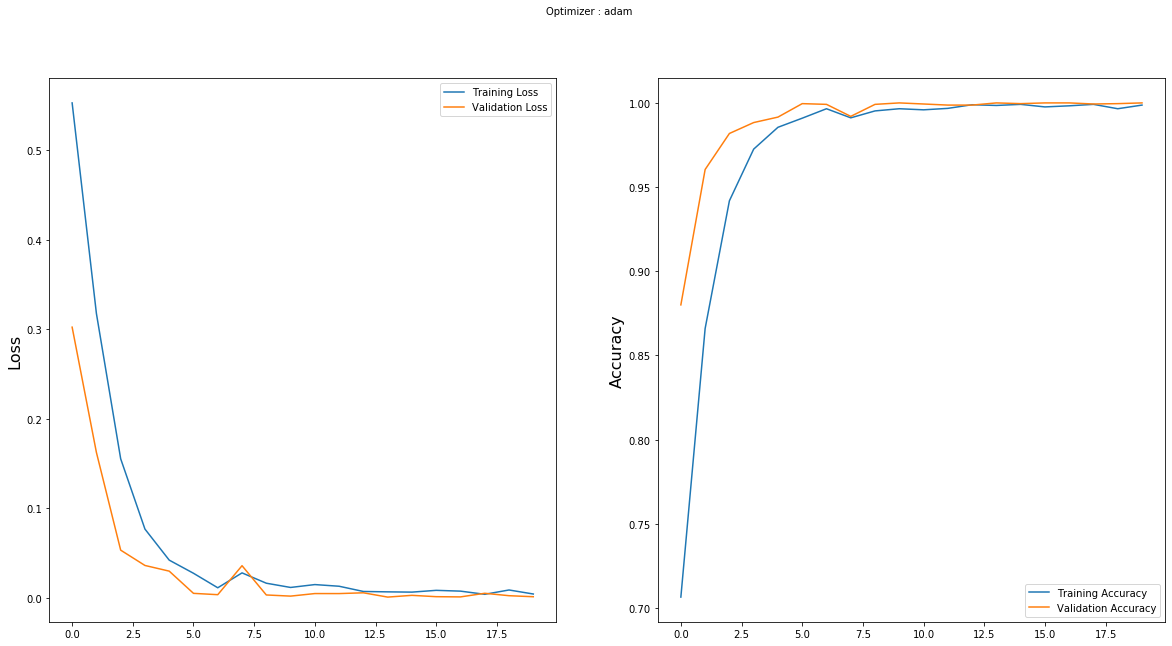

In [70]:
import matplotlib.pyplot as plt

x=trained5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Stock Price

In [144]:
dataset=pd.read_csv('data/Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [145]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [146]:
dataset.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

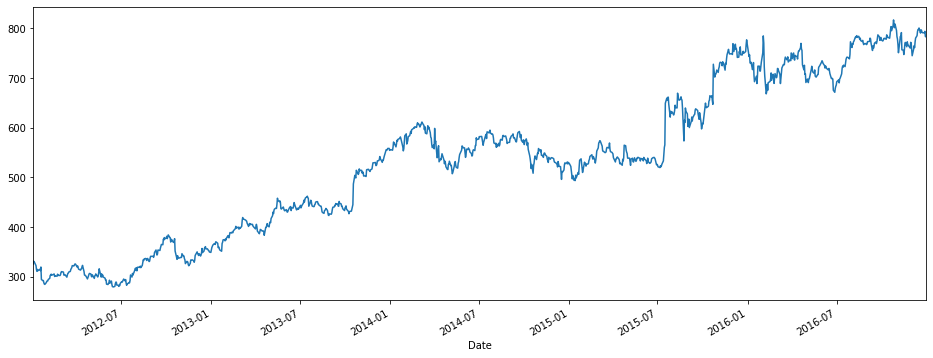

In [147]:
dataset['Open'].plot(figsize=(16,6))

In [148]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)

In [149]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [150]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


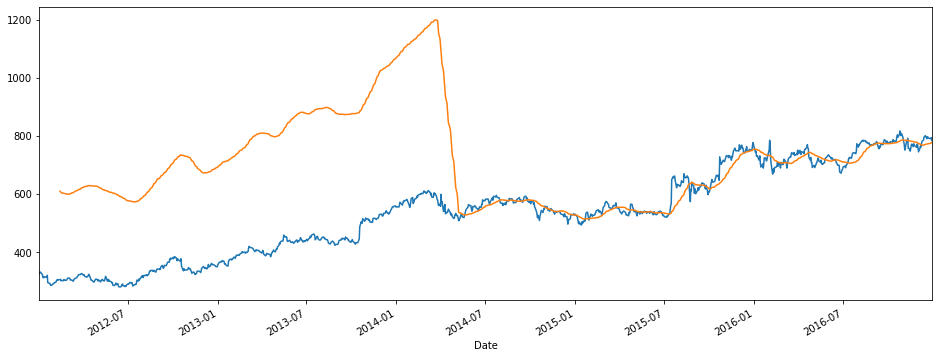

In [151]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

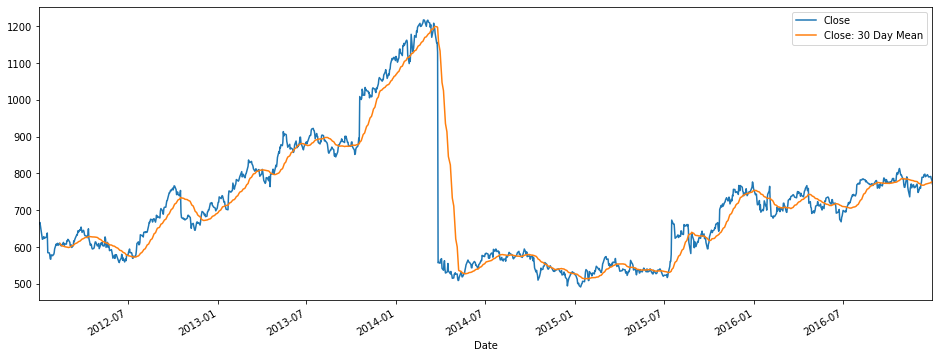

In [152]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

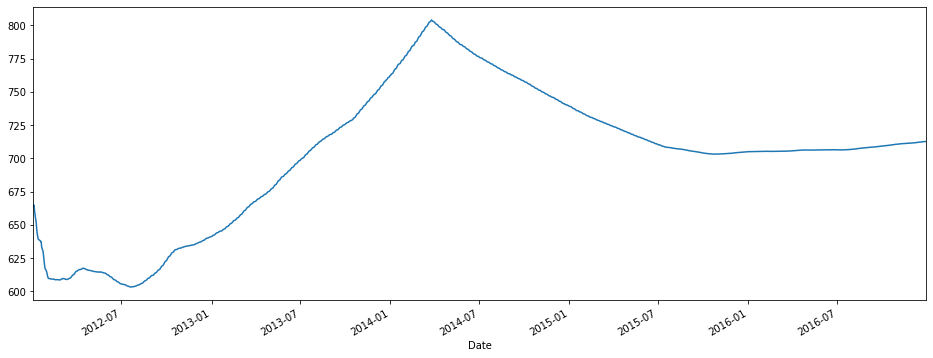

In [153]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [154]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [155]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [156]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [157]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [286]:
ML_Model1 = []
r2 = []
mse = []
rmse = []
mae = []

#function to call for storing the results
def storeResults1(model, a,b,c,d):
    ML_Model1.append(model)
    r2.append(round(a, 3))
    mse.append(round(d, 3))
    rmse.append(round(c, 3))
    mae.append(round(b, 3))

# MLP

In [158]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train, y_train) 
y_pred = mlp.predict(X_train)

In [159]:
r_mlp = r2_score(y_train, y_pred)
mse_mlp = mean_squared_error(y_train, y_pred)
rmse_mlp = sqrt(mse_mlp)
mae_mlp = mean_absolute_error(y_train, y_pred)

In [287]:
storeResults1('MLP',r_mlp,mse_mlp,rmse_mlp,mae_mlp)

# Voting Regressor

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()

eclf1 = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_train)

In [161]:
r_vot = r2_score(y_train, y_pred)
mse_vot = mean_squared_error(y_train, y_pred)
rmse_vot = sqrt(mse_vot)
mae_vot = mean_absolute_error(y_train, y_pred)

In [288]:
storeResults1('Voting Regressor',r_vot,mse_vot,rmse_vot,mae_vot)

DL

In [162]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# CNN

In [163]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [164]:
model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
30/30 [==============================] - 2s 28ms/step - loss: 0.0161 - val_loss: 0.0036
Epoch 2/100
30/30 [==============================] - 0s 17ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 3/100
30/30 [==============================] - 0s 17ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 4/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0016 - val_loss: 0.0059
Epoch 5/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 6/100
30/30 [==============================] - 1s 22ms/step - loss: 8.9937e-04 - val_loss: 0.0011
Epoch 7/100
30/30 [==============================] - 1s 21ms/step - loss: 7.9881e-04 - val_loss: 0.0013
Epoch 8/100
30/30 [==============================] - 1s 18ms/step - loss: 9.4659e-04 - val_loss: 7.1106e-04
Epoch 9/100
30/30 [==============================] - 1s 20ms/step - loss: 6.5131e-04 - val_loss: 0.0012
Epoch 10/100
30/30 [==============================] - 1s 22ms/step - loss: 5.109

30/30 [==============================] - 1s 20ms/step - loss: 2.2653e-04 - val_loss: 3.8257e-04
Epoch 78/100
30/30 [==============================] - 1s 27ms/step - loss: 2.2525e-04 - val_loss: 6.3588e-04
Epoch 79/100
30/30 [==============================] - 1s 23ms/step - loss: 2.2032e-04 - val_loss: 4.2237e-04
Epoch 80/100
30/30 [==============================] - 1s 23ms/step - loss: 2.1297e-04 - val_loss: 0.0011
Epoch 81/100
30/30 [==============================] - 1s 19ms/step - loss: 3.0194e-04 - val_loss: 3.5781e-04
Epoch 82/100
30/30 [==============================] - 1s 24ms/step - loss: 3.1277e-04 - val_loss: 4.8896e-04
Epoch 83/100
30/30 [==============================] - 1s 25ms/step - loss: 3.1703e-04 - val_loss: 0.0011
Epoch 84/100
30/30 [==============================] - 1s 27ms/step - loss: 2.4809e-04 - val_loss: 3.5833e-04
Epoch 85/100
30/30 [==============================] - 1s 24ms/step - loss: 2.4034e-04 - val_loss: 3.6293e-04
Epoch 86/100
30/30 [====================

In [165]:
# Prediction

y_pred_3 = model_3.predict(X_train)

In [166]:
r_cnn = r2_score(y_train, y_pred_3)
mse_cnn = mean_squared_error(y_train, y_pred_3)
rmse_cnn = sqrt(mse_vot)
mae_cnn = mean_absolute_error(y_train, y_pred_3)

In [289]:
storeResults1('CNN',r_cnn,mse_cnn,rmse_cnn,mae_cnn)

In [167]:
pred_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,0.086279,0.082659
1,0.084716,0.079603
2,0.074541,0.079564
3,0.078838,0.075187
4,0.072383,0.073143


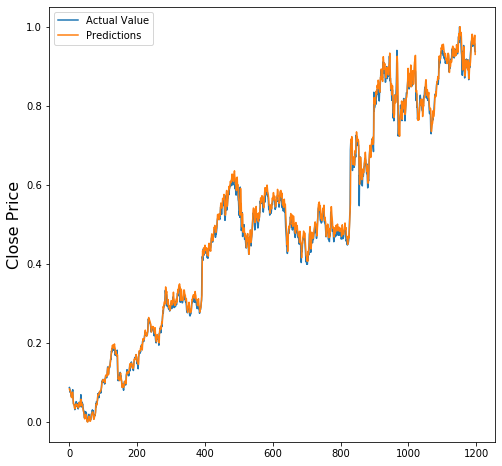

In [168]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# LSTM

In [169]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [170]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 136ms/step - loss: 0.0444
Epoch 2/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0042
Epoch 13/100

38/38 [==============================] - 5s 143ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0015


In [171]:
# Prediction

y_pred_3 = regressor.predict(X_train)

In [172]:
r_lstm = r2_score(y_train, y_pred_3)
mse_lstm = mean_squared_error(y_train, y_pred_3)
rmse_lstm = sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_train, y_pred_3)

In [290]:
storeResults1('LSTM',r_lstm,mse_lstm,rmse_lstm,mae_lstm)

In [173]:
pred_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,0.086279,0.075241
1,0.084716,0.077212
2,0.074541,0.078589
3,0.078838,0.078048
4,0.072383,0.076132


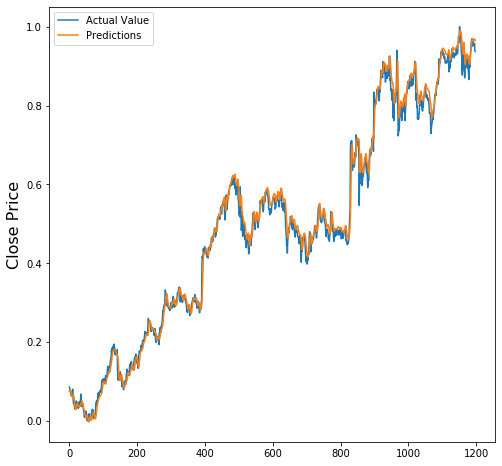

In [174]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# MS-LSTM

Multi-Stock data

In [175]:
dataset=pd.read_csv('data/all_stocks_5yr.csv',index_col="date",parse_dates=True)

In [176]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 619040 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [177]:
dataset.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [178]:
dataset = dataset.dropna()

In [179]:
dataset.isna().sum()

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

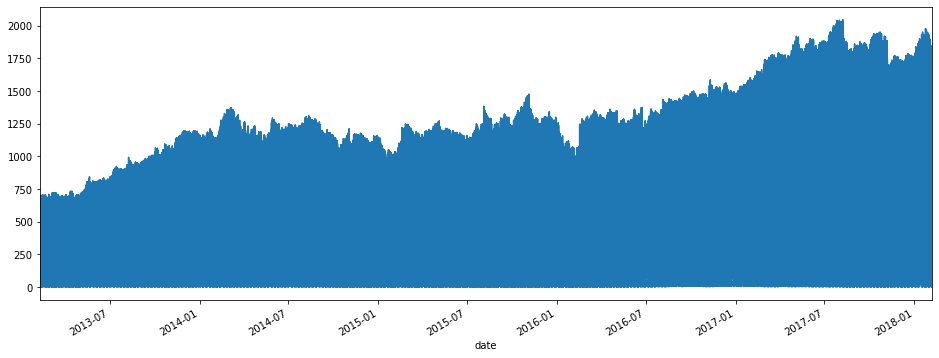

In [180]:
dataset['open'].plot(figsize=(16,6))

In [181]:
training_set=dataset['open']
training_set=pd.DataFrame(training_set)

In [182]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [183]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 10000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [184]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [185]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [186]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
311/311 [==============================] - 54s 143ms/step - loss: 6.5594e-05
Epoch 2/100
311/311 [==============================] - 45s 143ms/step - loss: 2.1701e-05
Epoch 3/100
311/311 [==============================] - 44s 143ms/step - loss: 1.7339e-05
Epoch 4/100
311/311 [==============================] - 45s 143ms/step - loss: 1.4427e-05
Epoch 5/100
311/311 [==============================] - 44s 143ms/step - loss: 1.3043e-05
Epoch 6/100
311/311 [==============================] - 44s 142ms/step - loss: 1.1472e-05
Epoch 7/100
311/311 [==============================] - 45s 144ms/step - loss: 1.1638e-05
Epoch 8/100
311/311 [==============================] - 44s 143ms/step - loss: 1.0484e-05
Epoch 9/100
311/311 [==============================] - 45s 144ms/step - loss: 1.0392e-05
Epoch 10/100
311/311 [==============================] - 44s 143ms/step - loss: 9.5299e-06
Epoch 11/100
311/311 [==============================] - 44s 142ms/step - loss: 9.2005e-06
Epoch 12/100
311/31

311/311 [==============================] - 45s 143ms/step - loss: 4.8669e-06
Epoch 92/100
311/311 [==============================] - 45s 143ms/step - loss: 4.7676e-06
Epoch 93/100
311/311 [==============================] - 45s 144ms/step - loss: 4.7574e-06
Epoch 94/100
311/311 [==============================] - 44s 143ms/step - loss: 4.9291e-06
Epoch 95/100
311/311 [==============================] - 45s 144ms/step - loss: 4.9001e-06
Epoch 96/100
311/311 [==============================] - 44s 143ms/step - loss: 5.0451e-06
Epoch 97/100
311/311 [==============================] - 44s 143ms/step - loss: 4.7357e-06
Epoch 98/100
311/311 [==============================] - 45s 144ms/step - loss: 4.6051e-06
Epoch 99/100
311/311 [==============================] - 45s 144ms/step - loss: 4.4231e-06
Epoch 100/100
311/311 [==============================] - 45s 143ms/step - loss: 4.7124e-06


In [187]:
# Prediction

y_pred_3 = regressor.predict(X_train)

In [188]:
r_lstm1 = r2_score(y_train, y_pred_3)
mse_lstm1 = mean_squared_error(y_train, y_pred_3)
rmse_lstm1 = sqrt(mse_lstm1)
mae_lstm1 = mean_absolute_error(y_train, y_pred_3)

In [291]:
storeResults1('MS-LSTM',r_lstm1,mse_lstm1,rmse_lstm1,mae_lstm1)

In [189]:
pred_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,0.007604,0.008753
1,0.007535,0.008792
2,0.007790,0.008751
3,0.007829,0.008912
4,0.007893,0.009013


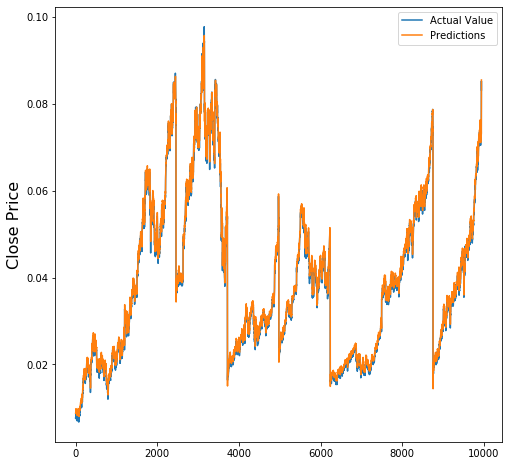

In [190]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# MS-SSA-LSTM

In [191]:
class SSA(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="SSA", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [192]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [193]:
optimizer=SSA()

In [194]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [195]:
# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
311/311 [==============================] - 56s 148ms/step - loss: 5.9519e-05
Epoch 2/100
311/311 [==============================] - 46s 148ms/step - loss: 2.2271e-05
Epoch 3/100
311/311 [==============================] - 46s 149ms/step - loss: 1.7832e-05
Epoch 4/100
311/311 [==============================] - 46s 148ms/step - loss: 1.5138e-05
Epoch 5/100
311/311 [==============================] - 46s 150ms/step - loss: 1.2989e-05
Epoch 6/100
311/311 [==============================] - 46s 148ms/step - loss: 1.1539e-05
Epoch 7/100
311/311 [==============================] - 47s 150ms/step - loss: 1.1687e-05
Epoch 8/100
311/311 [==============================] - 46s 149ms/step - loss: 1.0762e-05
Epoch 9/100
311/311 [==============================] - 46s 149ms/step - loss: 1.0190e-05
Epoch 10/100
311/311 [==============================] - 46s 148ms/step - loss: 1.0095e-05
Epoch 11/100
311/311 [==============================] - 47s 150ms/step - loss: 9.3472e-06
Epoch 12/100
311/31

311/311 [==============================] - 45s 146ms/step - loss: 5.0390e-06
Epoch 92/100
311/311 [==============================] - 45s 146ms/step - loss: 4.7229e-06
Epoch 93/100
311/311 [==============================] - 45s 145ms/step - loss: 4.7644e-06
Epoch 94/100
311/311 [==============================] - 45s 145ms/step - loss: 4.9560e-06
Epoch 95/100
311/311 [==============================] - 45s 145ms/step - loss: 4.8597e-06
Epoch 96/100
311/311 [==============================] - 45s 145ms/step - loss: 5.0361e-06
Epoch 97/100
311/311 [==============================] - 46s 146ms/step - loss: 4.7263e-06
Epoch 98/100
311/311 [==============================] - 45s 145ms/step - loss: 4.7378e-06
Epoch 99/100
311/311 [==============================] - 45s 146ms/step - loss: 4.4659e-06
Epoch 100/100
311/311 [==============================] - 45s 145ms/step - loss: 4.8316e-06


In [196]:
# Prediction

y_pred_3 = regressor.predict(X_train)

In [197]:
r_lstm3 = r2_score(y_train, y_pred_3)
mse_lstm3 = mean_squared_error(y_train, y_pred_3)
rmse_lstm3 = sqrt(mse_lstm3)
mae_lstm3 = mean_absolute_error(y_train, y_pred_3)

In [292]:
storeResults1('MS-SSA-LSTM',r_lstm3,mse_lstm3,rmse_lstm3,mae_lstm3)

In [198]:
pred_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,0.007604,0.008522
1,0.007535,0.008561
2,0.007790,0.008521
3,0.007829,0.008686
4,0.007893,0.008773


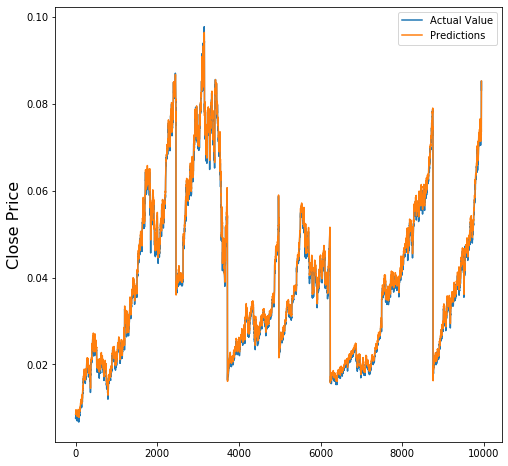

In [199]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# Comparison

# Stock Sentiment

In [271]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score
                      })

In [272]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,MLP,0.771,0.771,0.771,0.770
1,CNN,0.773,0.761,0.773,0.774
2,LSTM,1.000,1.000,1.000,1.000
3,MS-LSTM,0.998,0.998,0.998,0.998
4,MS-SSA-LSTM,1.000,1.000,1.000,1.000
5,Voting CLassifier,0.803,0.808,0.803,0.819
6,LSTM-GRU,1.000,1.000,1.000,1.000


# Graph

In [273]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

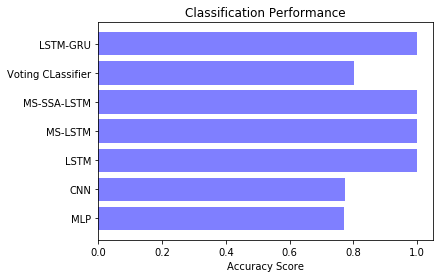

In [274]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

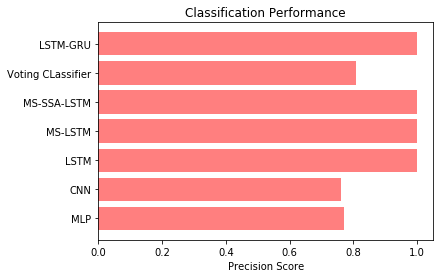

In [275]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

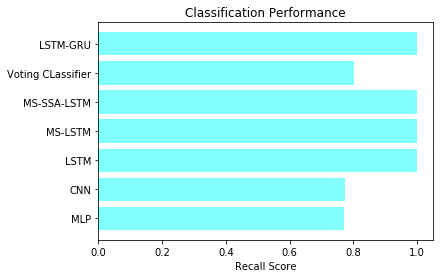

In [276]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

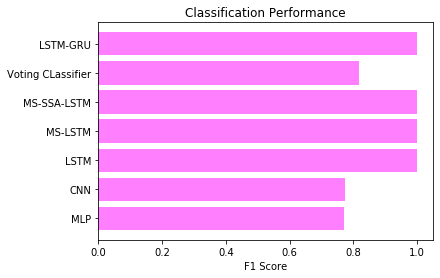

In [277]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Stock Price

In [297]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

In [298]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'R2 Score' : r2,
                        'MSE': mse,
                        'RMSE'   : rmse,
                        'MAE': mae
                      })

In [299]:
result

,ML Model,R2 Score,MSE,RMSE,MAE
0,MLP,0.987,0.023,0.030,0.001
1,Voting Regressor,0.999,0.006,0.010,0.000
2,CNN,0.996,0.011,0.010,0.000
3,LSTM,0.992,0.017,0.024,0.001
4,MS-LSTM,0.995,0.001,0.001,0.000
5,MS-SSA-LSTM,0.994,0.001,0.001,0.000


# R2 Score

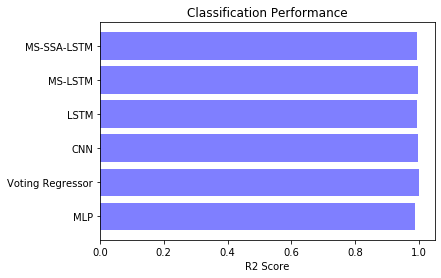

In [300]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, r2, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()

# MSE

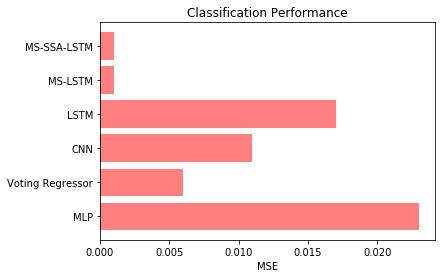

In [301]:
plt2.barh(y_pos, mse, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MSE')
plt2.title('Classification Performance')
plt2.show()

# RMSE

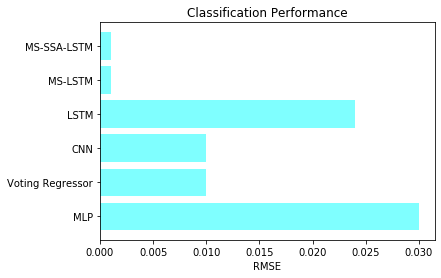

In [302]:
plt2.barh(y_pos, rmse, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('RMSE')
plt2.title('Classification Performance')
plt2.show()

# MAE

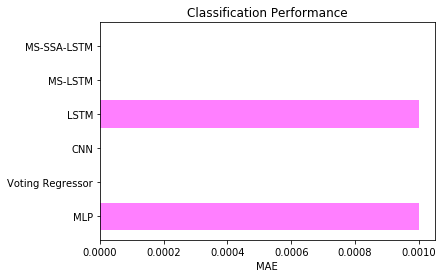

In [303]:
plt2.barh(y_pos, mae, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MAE')
plt2.title('Classification Performance')
plt2.show()